# Exploratory Data Analysis

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\EXCELR\\EXCELR\\EDA1\\Cardiotocographic.csv")

# 1. Data cleaning and preparation

In [5]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [7]:
#Data Structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


#### Handle missing values

In [9]:
data.isnull().sum().sum()

167

In [11]:
data[data.isnull().any(axis=1)].shape

(21, 14)

##### Only 21 rows having the 167 missing values so instead of replace those missing values with average we decide to delete those rows.

In [13]:
data.dropna(inplace=True)

In [15]:
data.reset_index(drop=True, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 230.4 KB


In [19]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#### Detect and treat outliers

<Axes: >

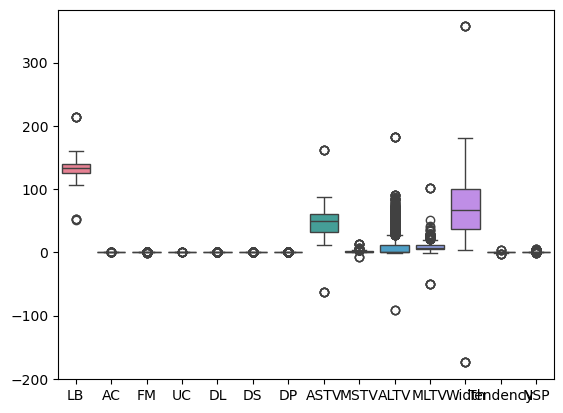

In [21]:
sns.boxplot(data)

##### All the values have outliers, so I deleted outliers in those variables where they are very few, like the columns named LB, ASTV, Width, and Tendency. Replace the outliers in those variables where much number of outliers are present then I replace outliers larger than the upper bound same as the upper bound and the outliers less than the lower bound as the lower bound, those variables are AC, FM, UC, DL, MSTV, ALTV, and MLTV. And lastly, in those variables where the IQR value is 0, we retain outliers as it is, those variables are DS, DP, and NSP. Like this, I treat outliers in this dataset.

#### Delete outliers

In [23]:
# Calculate Q1, Q3, and IQR
Q1 = data['LB'].quantile(0.25)
Q3 = data['LB'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['LB'] >= lower_bound) & (data['LB'] <= upper_bound)]

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = data['ASTV'].quantile(0.25)
Q3 = data['ASTV'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['ASTV'] >= lower_bound) & (data['ASTV'] <= upper_bound)]

In [27]:
# Calculate Q1, Q3, and IQR
Q1 = data['Width'].quantile(0.25)
Q3 = data['Width'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['Width'] >= lower_bound) & (data['Width'] <= upper_bound)]

In [29]:
# Calculate Q1, Q3, and IQR
Q1 = data['Tendency'].quantile(0.25)
Q3 = data['Tendency'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['Tendency'] >= lower_bound) & (data['Tendency'] <= upper_bound)]

#### Replace outliers

In [31]:
# Calculate Q1, Q3, and IQR
Q1 = data['AC'].quantile(0.25)
Q3 = data['AC'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['AC'] = data['AC'].clip(lower=lower_bound, upper=upper_bound)

In [33]:
# Calculate Q1, Q3, and IQR
Q1 = data['FM'].quantile(0.25)
Q3 = data['FM'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['FM'] = data['FM'].clip(lower=lower_bound, upper=upper_bound)

In [35]:
# Calculate Q1, Q3, and IQR
Q1 = data['UC'].quantile(0.25)
Q3 = data['UC'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['UC'] = data['UC'].clip(lower=lower_bound, upper=upper_bound)

In [37]:
# Calculate Q1, Q3, and IQR
Q1 = data['DL'].quantile(0.25)
Q3 = data['DL'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['DL'] = data['DL'].clip(lower=lower_bound, upper=upper_bound)

In [39]:
# Calculate Q1, Q3, and IQR
Q1 = data['MSTV'].quantile(0.25)
Q3 = data['MSTV'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['MSTV'] = data['MSTV'].clip(lower=lower_bound, upper=upper_bound)

In [41]:
# Calculate Q1, Q3, and IQR
Q1 = data['ALTV'].quantile(0.25)
Q3 = data['ALTV'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['ALTV'] = data['ALTV'].clip(lower=lower_bound, upper=upper_bound)

In [43]:
# Calculate Q1, Q3, and IQR
Q1 = data['MLTV'].quantile(0.25)
Q3 = data['MLTV'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['MLTV'] = data['MLTV'].clip(lower=lower_bound, upper=upper_bound)

# 2. Statistical summary

In [45]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,133.265923,0.003132,0.001548,0.004368,0.001776,0.000003,0.000175,47.041239,1.305142,6.736919,8.022623,70.306377,0.320406,1.306878
std,9.820655,0.003831,0.002455,0.003014,0.002681,0.000143,0.000839,17.189837,0.779983,10.396936,5.108037,38.910296,0.611284,0.646797
min,106.000000,-0.008424,-0.003810,-0.005304,-0.004967,-0.001353,-0.005348,11.799846,-0.800000,-16.500000,-4.850000,3.000000,-1.006614,-1.025988
25%,126.000000,0.000000,0.000000,0.001826,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001643,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005616,0.002540,0.006579,0.003311,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,160.000000,0.014040,0.006349,0.013709,0.008278,0.002706,0.010695,87.000000,3.200000,27.500000,20.350000,180.000000,1.023635,5.000000


In [47]:
quartile = {
    'LB_Q1': [126.000000], 'LB_Q3': [140.000000],
    'AC_Q1': [0.000000], 'AC_Q3': [0.005616],
    'FM_Q1': [0.000000], 'FM_Q3': [0.002540],
    'UC_Q1': [0.001826], 'UC_Q3': [0.006579],
    'DL_Q1': [0.000000], 'DL_Q3': [0.003311],
    'DS_Q1': [0.000000], 'DS_Q3': [0.000000],
    'DP_Q1': [0.000000], 'DP_Q3': [0.000000],
    'ASTV_Q1': [32.000000], 'ASTV_Q3': [61.000000],
    'MSTV_Q1': [0.700000], 'MSTV_Q3': [1.700000],
    'ALTV_Q1': [0.000000], 'ALTV_Q3': [11.000000],
    'MLTV_Q1': [4.600000], 'MLTV_Q3': [10.900000],
    'Width_Q1': [37.000000], 'Width_Q3': [100.000000],
    'Tendency_Q1': [0.000000], 'Tendency_Q3': [1.000000],
    'NSP_Q1': [1.000000], 'NSP_Q3': [1.000000]
    
}

df = pd.DataFrame(quartile)

In [49]:
iqr_results = {}

for column in df.columns:
    if column.endswith('_Q1'):
        # Extract the corresponding Q1 and Q3 column names
        q1_column = column
        q3_column = column.replace('_Q1', '_Q3')
        
        # Calculate IQR
        iqr = df[q3_column].values[0] - df[q1_column].values[0]
        
        # Store the result
        iqr_results[column.replace('_Q1', '')] = iqr

# Convert results to a DataFrame for better readability
iqr_df = pd.DataFrame(list(iqr_results.items()), columns=['Column', 'IQR'])

print(iqr_df)

      Column        IQR
0         LB  14.000000
1         AC   0.005616
2         FM   0.002540
3         UC   0.004753
4         DL   0.003311
5         DS   0.000000
6         DP   0.000000
7       ASTV  29.000000
8       MSTV   1.000000
9       ALTV  11.000000
10      MLTV   6.300000
11     Width  63.000000
12  Tendency   1.000000
13       NSP   0.000000


# 3. Data visualization

<Axes: >

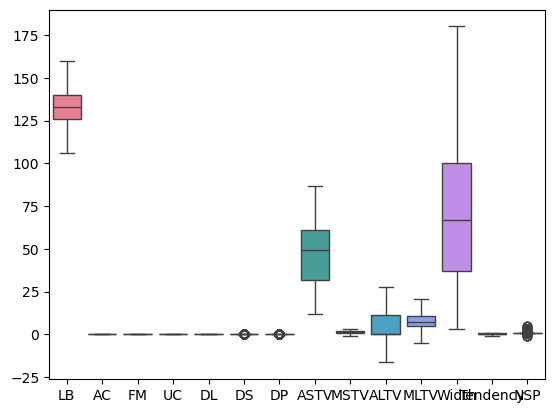

In [51]:
sns.boxplot(data=data, orient='v')

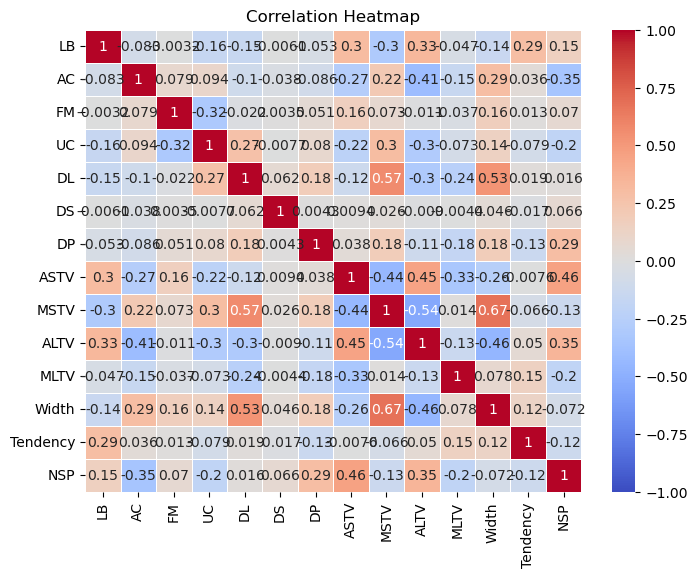

In [53]:
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

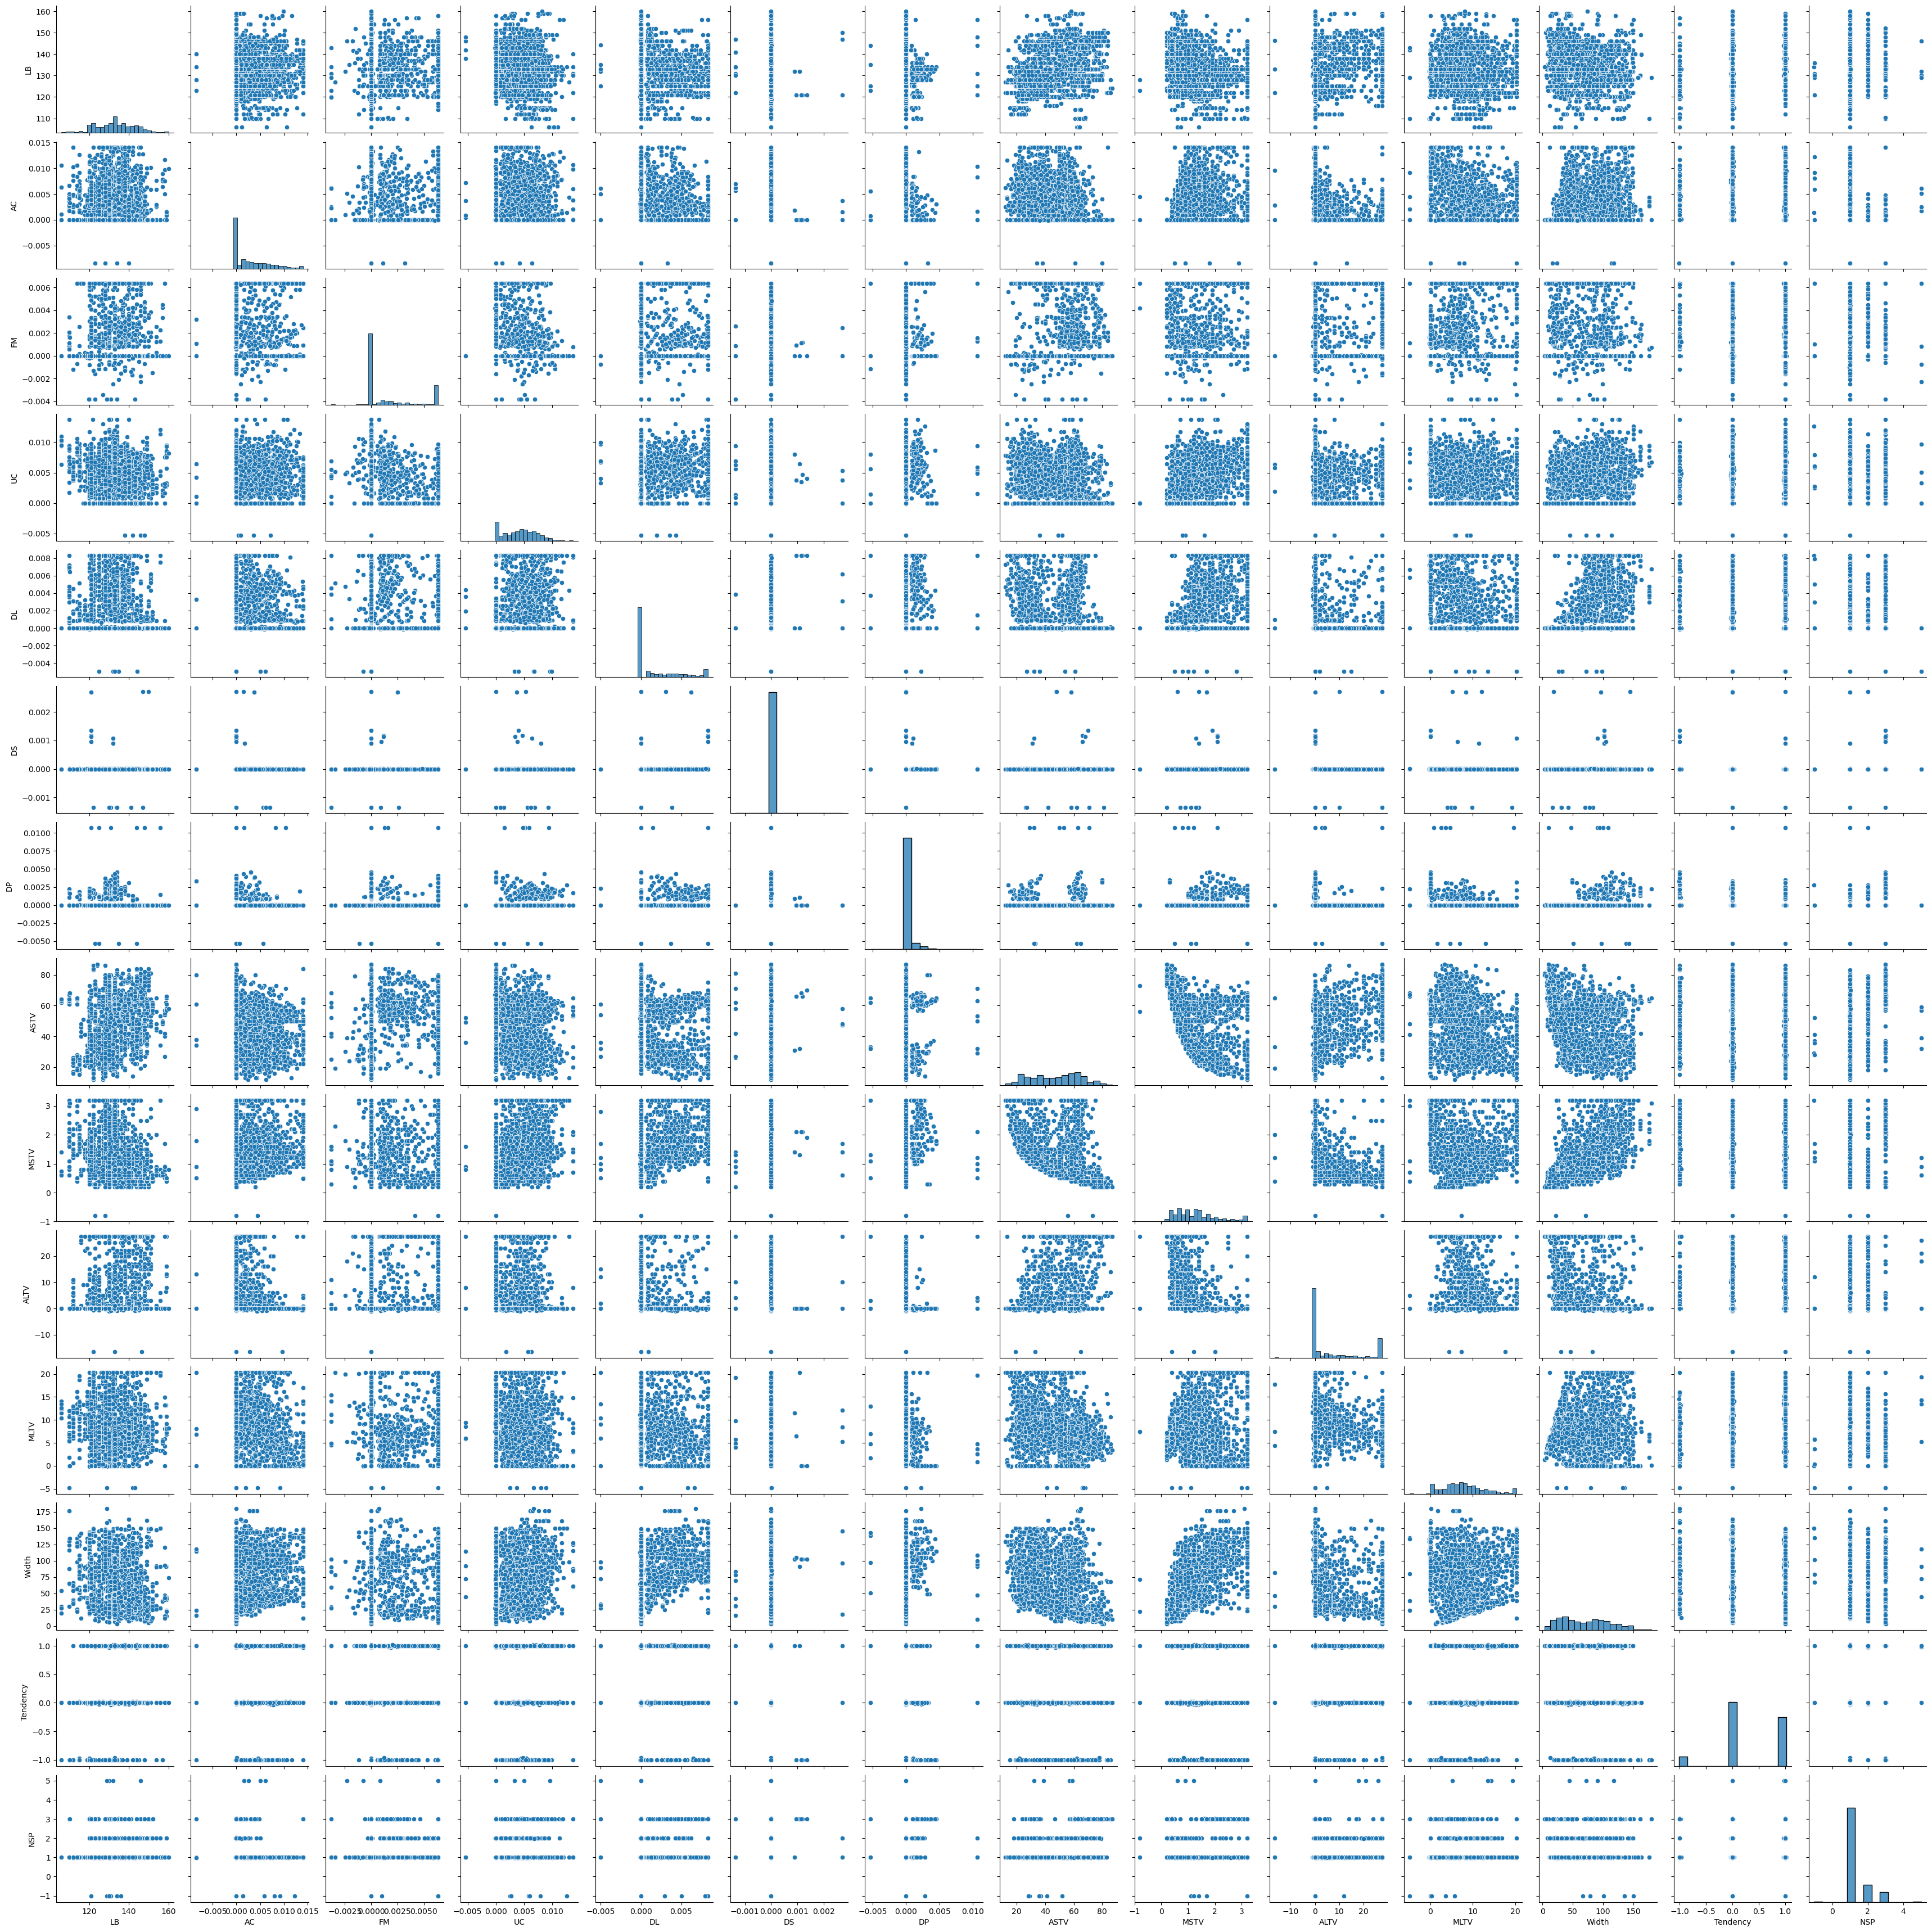

In [55]:
# Create the pairplot
sns.pairplot(data)
plt.show()

# 4. Pattern recognition and insight

In [57]:
data.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.083480,-0.003207,-0.160386,-0.152725,-0.006133,-0.052719,0.304825,-0.302600,0.328515,-0.047185,-0.143782,0.293226,0.148488
AC,-0.083480,1.000000,0.078525,0.093862,-0.102949,-0.038002,-0.086213,-0.269751,0.215568,-0.408833,-0.152626,0.291708,0.036410,-0.351326
FM,-0.003207,0.078525,1.000000,-0.316300,-0.021660,0.003543,0.050722,0.157665,0.073108,-0.010750,-0.037444,0.164310,0.012770,0.069989
UC,-0.160386,0.093862,-0.316300,1.000000,0.269575,-0.007659,0.080498,-0.224347,0.300698,-0.295526,-0.073124,0.142020,-0.078968,-0.201060
DL,-0.152725,-0.102949,-0.021660,0.269575,1.000000,0.061939,0.183548,-0.119477,0.570154,-0.297565,-0.243866,0.529786,0.018537,0.015945
DS,-0.006133,-0.038002,0.003543,-0.007659,0.061939,1.000000,0.004331,0.009421,0.025785,-0.008986,-0.004355,0.045502,-0.016556,0.065739
DP,-0.052719,-0.086213,0.050722,0.080498,0.183548,0.004331,1.000000,0.037504,0.182918,-0.113117,-0.176602,0.179890,-0.134747,0.290694
ASTV,0.304825,-0.269751,0.157665,-0.224347,-0.119477,0.009421,0.037504,1.000000,-0.442008,0.450359,-0.328718,-0.256219,-0.007621,0.457930
MSTV,-0.302600,0.215568,0.073108,0.300698,0.570154,0.025785,0.182918,-0.442008,1.000000,-0.543170,0.013910,0.674892,-0.065563,-0.126869
ALTV,0.328515,-0.408833,-0.010750,-0.295526,-0.297565,-0.008986,-0.113117,0.450359,-0.543170,1.000000,-0.132967,-0.456603,0.049756,0.351286


##### Here, not a single variable present which have high correlation with the other vaiable. All the variables having either low or moderate correlation. If we talk about degree of correlation then MSTV and Width having the highest corrleation among the all pairs of variable that is 0.674 which is positive moderate correlation then MSTV is moderately correlated with DL and ALTV with degree of 0.57 and -0.54 respectively. Then, the correlation of DL and Width is also positive moderate correlation with degree of 0.529. Insted of these variables few more variables having the correlation lies between 0.3- 0.4 in both positive and negative direction. Then, all other variables have very negligible coorelation i.e; almost same as zero. 

# 5. Conclusion

#### a) Here, I done all the exploratory analysis like handle missing values, detect and treat outliers, check the correlation between the variables and see the patterns of data through different visualization and found that in this dataset the correlation of variables are not very satisfactory it lies between low to moderate level in both positive and negative direction.

#### b) With this data now we can analyze further and make a decision because it's now a processed data which we can put in any machine learning model and get meaningful insights.